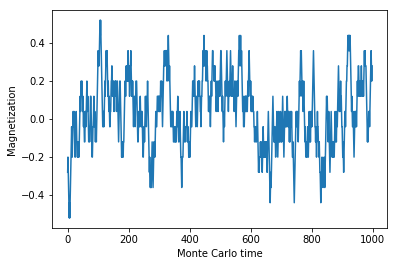

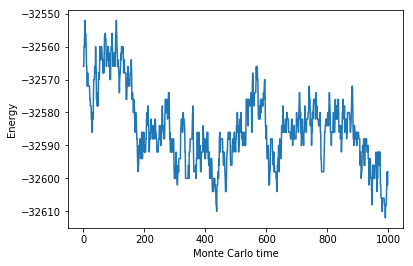

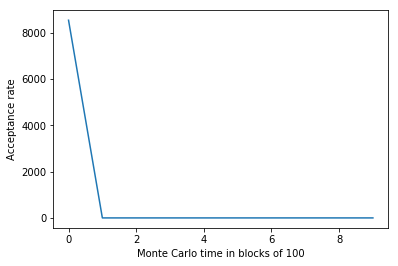

In [12]:
# define the system parameters
import numpy as np
import matplotlib.pyplot as plt

L = 5      # size of lattice in each direction
J = -1       # interaction parameter
h = 0       # magnetic field
T = 10       # temperature
beta = 1/T  # set k_B = 1

# define the state of the system: LxL grid with (initially) a random spin in each cell
config = 2*np.random.randint(2, size=(L,L))-1

# energy of a given state
def energy():  
    # elegant way of writing the sum over all nearest neighbors in the grid
    interaction = -J*( np.sum(config[0:L-1,:]*config[1:L,:]) +     # contributions of top/bottom neighbors
                       np.sum(config[:,0:L-1,]*config[:,1:L]))     # contributions of left/right neighbors
    
    magnetic = -h*np.sum(config)
    return interaction + magnetic

current_energy = energy()

# magnetization of a given state
def magnetization():
    return np.sum(config)/L/L

# Monte Carlo update using Metropolis algorithm
def update():
    
    global config, current_energy    # we want to be able to change the configuration
    
    # choose a random cell in the grid
    cell = np.random.randint(L, size=2)
    i = cell[0]
    j = cell[1]
    
    # calculate the current contribution of this cell to the total energy
    energy_cell = 0
    # be careful with the boundary
    if i != 0:   energy_cell += config[i-1, j]   # left neighbor
    else:                                    
        energy_cell += config[L-1, j] 
    if i != L-1: energy_cell += config[i+1, j]   # top neighbor
    if j != 0:   energy_cell += config[i, j-1]   # right neighbor
    else:                                    
        energy_cell += config[i, L-1]        
    if j != L-1: energy_cell += config[i, j+1]   # bottom neighbor
        
    # the current contribution to the interaction energy is: -J*energy_cell*config[i,j]
    # if we flip the spin, i.e. change config[i,j] to -config[i,j], the new contribution will also change sign
    # this means that overall:
    
    energy_difference = 2*J*energy_cell*config[i,j]
    
    # additional contribution due to the magnetic field
    energy_difference += 2*h*config[i,j]
    
    # check if update is accepted
    accept = False
    if energy_difference<0: 
        accept = True    # always accept updates that decrease the energy
    else:
        prob = np.exp(-beta*energy_difference)
        # standard to calculate event given a probability (see example biasedCoin() in Section 3.1.3)
        rand = np.random.rand()
        if rand<prob:
            accept = True
            
    # if update is accepted we flip the spin
    if accept == True:
        config[i, j] = -config[i, j]
        current_energy += energy_difference
    
    # keep track of the acceptance probability
    return accept

# run the simulation
steps = int(1e6)
magnetization_results = []
energy_results = []
accept_results = []
accept_counter = 0

for counter in range(steps):

    accept_counter += update()
    # keep track of acceptance rates in blocks of 100 steps
    if counter%100 == 99:
        if counter > steps-1000:
            accept_results.append(accept_counter/100)
            accept_counter=0
    if counter > steps-1000:
        energy_results.append(current_energy)
        magnetization_results.append(magnetization())
    
plt.plot(magnetization_results)
plt.xlabel("Monte Carlo time")
plt.ylabel("Magnetization")
plt.show()

plt.plot(energy_results)
plt.xlabel("Monte Carlo time")
plt.ylabel("Energy")
plt.show()

plt.plot(accept_results)
plt.xlabel("Monte Carlo time in blocks of 100")
plt.ylabel("Acceptance rate")
plt.show()